In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [2]:
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    BASE_DIR = os.getcwd()

file_path = os.path.join(BASE_DIR, "data", "StudentPerformanceFactors_Cleaned.csv")
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(df.shape)
print(df.head())


✅ Dataset loaded successfully!
(6607, 20)
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375             -0.254249            -1.380517   
1      -0.162822   -1.383736             -0.254249             0.913804   
2       0.671882    1.560853              0.901062             0.913804   
3       1.506587    0.781403             -0.254249             0.913804   
4      -0.162822    1.041220              0.901062             0.913804   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                   -1.214685    -0.019796        -0.143800         -0.393061   
1                   -1.214685     0.661399        -1.116110         -0.393061   
2                    0.823259    -0.019796         1.106313          0.884966   
3                    0.823259     0.661399         1.592469          0.884966   
4                    0.823259    -0.700990        -0.699406          0.884966   

   Internet_Access  

In [3]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 5285, Testing samples: 1322


# Linear regression model

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\n✅ Model trained successfully!")


✅ Model trained successfully!


# Make predictions


In [24]:
y_pred_linear = model.predict(X_test)

print("\n✅ Predictions made successfully!")


✅ Predictions made successfully!


# Model Evaluation

In [25]:
# 5️⃣ Evaluate Model
y_pred_linear = model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\n📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R² Score: {r2_linear:.4f}")

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_linear
})
print("\nSample predictions comparison:")
print(comparison.head())


📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.02
Mean Squared Error (MSE): 4.40
Root Mean Squared Error (RMSE): 2.10
R² Score: 0.6888

Sample predictions comparison:
   Actual  Predicted
0      65  65.216613
1      65  67.448411
2      71  69.829703
3      64  67.287805
4      66  66.758159


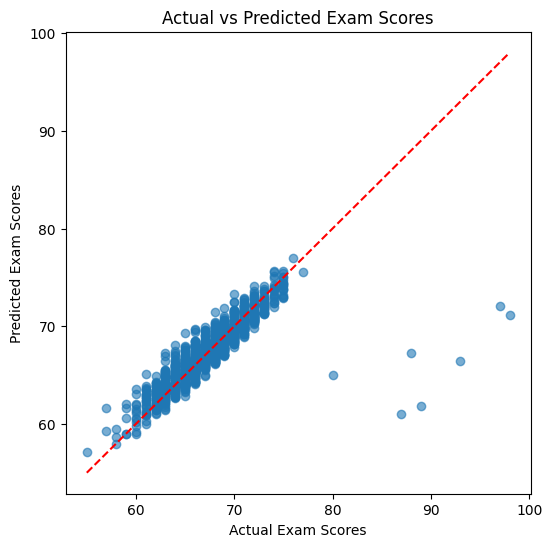

In [26]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# polynomial regression


In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial transformation (e.g., degree=2 or 3)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Model training

In [28]:
# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)


LinearRegression()

# Model prediction

In [29]:
y_pred_poly = poly_reg.predict(X_test_poly)
print("\n✅ Polynomial Regression Predictions made successfully!")


✅ Polynomial Regression Predictions made successfully!


# Evaluation


In [30]:
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)

print(f"R² Score: {r2_poly:.4f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.4f}")

R² Score: 0.7581
Mean Absolute Error (MAE): 0.5564
Root Mean Squared Error (RMSE): 1.8490


# Both models comparison

In [31]:
print("📊 Model Comparison:\n")
print(f"{'Model':<25}{'R² Score':<15}{'MAE':<15}{'RMSE':<15}")
print("-" * 70)
print(f"{'Linear Regression':<25}{r2_linear:<15.4f}{mae_linear:<15.4f}{rmse_linear:<15.4f}")
print(f"{'Polynomial Regression (deg=2)':<25}{r2_poly:<15.4f}{mae_poly:<15.4f}{rmse_poly:<15.4f}")

📊 Model Comparison:

Model                    R² Score       MAE            RMSE           
----------------------------------------------------------------------
Linear Regression        0.6888         1.0155         2.0974         
Polynomial Regression (deg=2)0.7581         0.5564         1.8490         


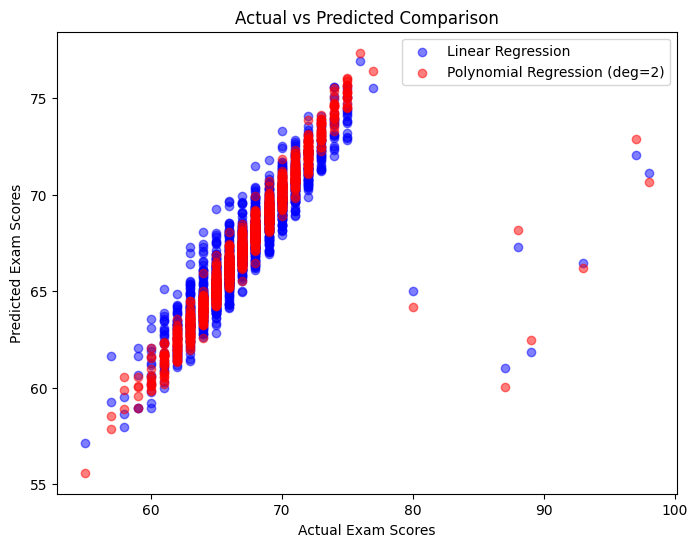

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_poly, color='red', alpha=0.5, label='Polynomial Regression (deg=2)')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.legend()
plt.title("Actual vs Predicted Comparison")
plt.show()